In [3]:
print('Start import')
import socket 
import strax
import straxen
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import pandas as pd
print(
f'''Working on {socket.getfqdn()} with the following versions 
and installation paths:
strax
\tv{strax.__version__}\t{str(strax.__path__[0])}
straxen
\tv{straxen.__version__}\t{str(straxen.__path__[0])}
''')
from multihist import Hist1d, Histdd
import time
import itertools
import os
import math
from scipy import stats
from straxen import units
from scipy.optimize import curve_fit
from datetime import datetime, timedelta
from scipy.interpolate import interp1d
from scipy.stats import beta, chi2

import peaks_utility as psu
import drift_diffusion_utility as ddu
import s2widthcut_utility as wcu
import cutax

Start import
Working on midway2-0416.rcc.local with the following versions 
and installation paths:
strax
	v1.0.0	/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/strax
straxen
	v1.0.0	/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/straxen



In [4]:
st = cutax.xenonnt_v4(cuts_for=['commissioning.krypton_selections', 'commissioning.commissioning_cuts'])

In [32]:
#dsets = st.select_runs(include_tags='_sr0_preliminary', run_mode='ambe*',available='event_info')
dsets = st.select_runs(include_tags='_sr0_preliminary', run_mode='tpc_kr83m',available='event_info')

In [ ]:
dsets = dsets[(dsets.end > pd.to_datetime('06/03/2021'))]

In [ ]:
AmBe_runs = np.array(dsets['name'])

In [ ]:
AmBe_runs

In [3]:
#events = wcu.merge_runs_cutax(st,AmBe_runs)
#events.to_pickle('data/SR0_v4_AmBe_21286_21463_datasets.pkl')
ev = pd.read_pickle('data/SR0_v4_AmBe_21286_21463_datasets.pkl')

In [4]:
cut=(ev['cut_s1_max_pmt'])&(ev['cut_daq_veto'])&(ev['cut_s1_area_fraction_top'])&(ev['cut_s2_single_scatter'])
mask = wcu.basic_cuts(ev) & cut & ev['cut_fiducial_volume']
maskNW, maskFW = wcu.mask_events_near_wire(ev)
#FV4t = (-134.238,-13.6132,60.73**2)
#FV4t = (-134.238, -2, 60.73**2)

In [5]:
def analysis(events,title='AmBe data',modKr=(44.47,0.676,2.9)):
    ddu.plot_area_width_aft(events,title, low = 0, high = 7, low2 = 0, high2 = 1, binning = 500)
    wcu.plot_r2_z(events,title)
    wcu.S2WidthBasic(events, title, mod_par=modKr, wrange = (0,40000), fit_range = (250,1500), plot=1 )
    #S2WidthCut = wcu.S2WidthNormalized(events,title, mod_par = modKr, wrange = (0,10), plot=1)
    S2WidthCut0 = wcu.S2WidthNormLine(events,title, mod_par = modKr, wrange = (0,10), ll = 0, hh = 2, plot=0)
    S2WidthCut1 = wcu.S2WidthNormLine(events,title, mod_par = modKr, wrange = (0,10), ll = 2, hh = 5, plot=1)
    S2WidthCut2 = wcu.S2WidthNormLine(events,title, mod_par = modKr, wrange = (0,10), ll = 5, hh = 30, plot=0)
    wcu.plot_position_distribution_cnn(events[S2WidthCut0], events[S2WidthCut1],
                                   title1=title+' - S2WidthNorm < 2', title2=title+' - 2 < S2WidthNorm < 5', rebin=1)
    wcu.plot_r2_z(events[S2WidthCut0],title+' - S2WidthNorm < 2')
    wcu.S2WidthBasic(events[S2WidthCut0], title+' - S2WidthNorm < 2', mod_par=modKr, wrange=(0,40000), fit_range = (250,1500), plot=1 )
    wcu.plot_r2_z(events[S2WidthCut1],title+' - 2 < S2WidthNorm < 5')
    wcu.S2WidthBasic(events[S2WidthCut1], title+' - 2 < S2WidthNorm < 5', mod_par=modKr, wrange=(0,40000), fit_range = (250,1500), plot=1 )
    wcu.plot_r2_z(events[S2WidthCut2],title+' - S2WidthNorm > 5')
    wcu.S2WidthBasic(events[S2WidthCut2], title+' - S2WidthNorm > 5', mod_par=modKr, wrange=(0,40000), fit_range = (250,1500), plot=1 )

total events 38554
selected events 38554


/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:452: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


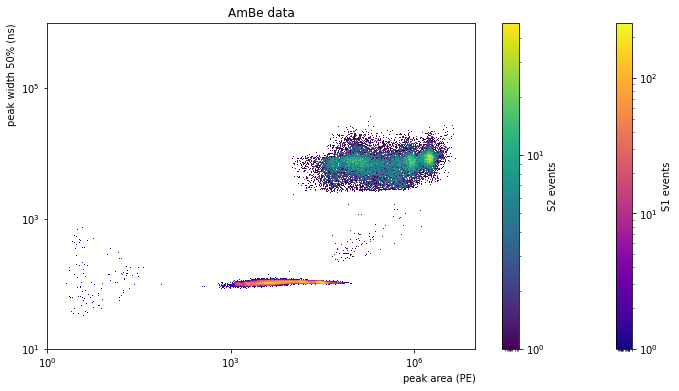

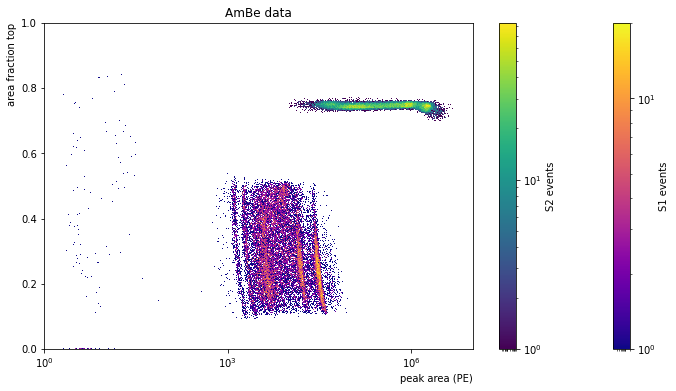

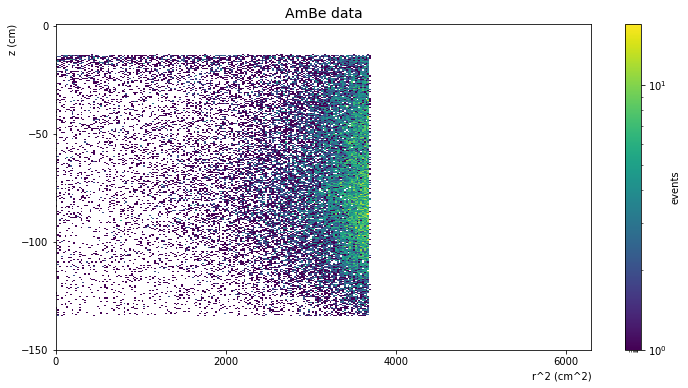

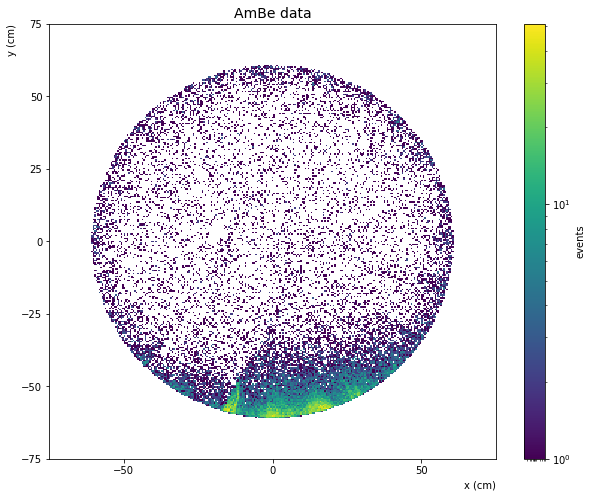

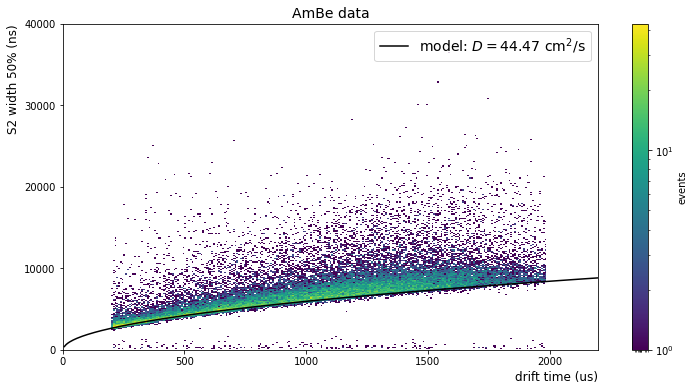

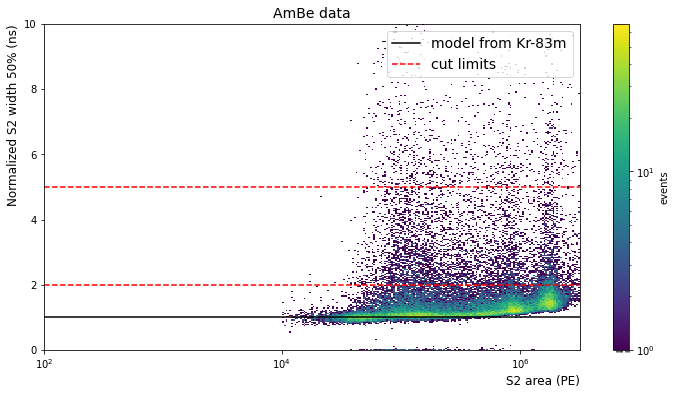

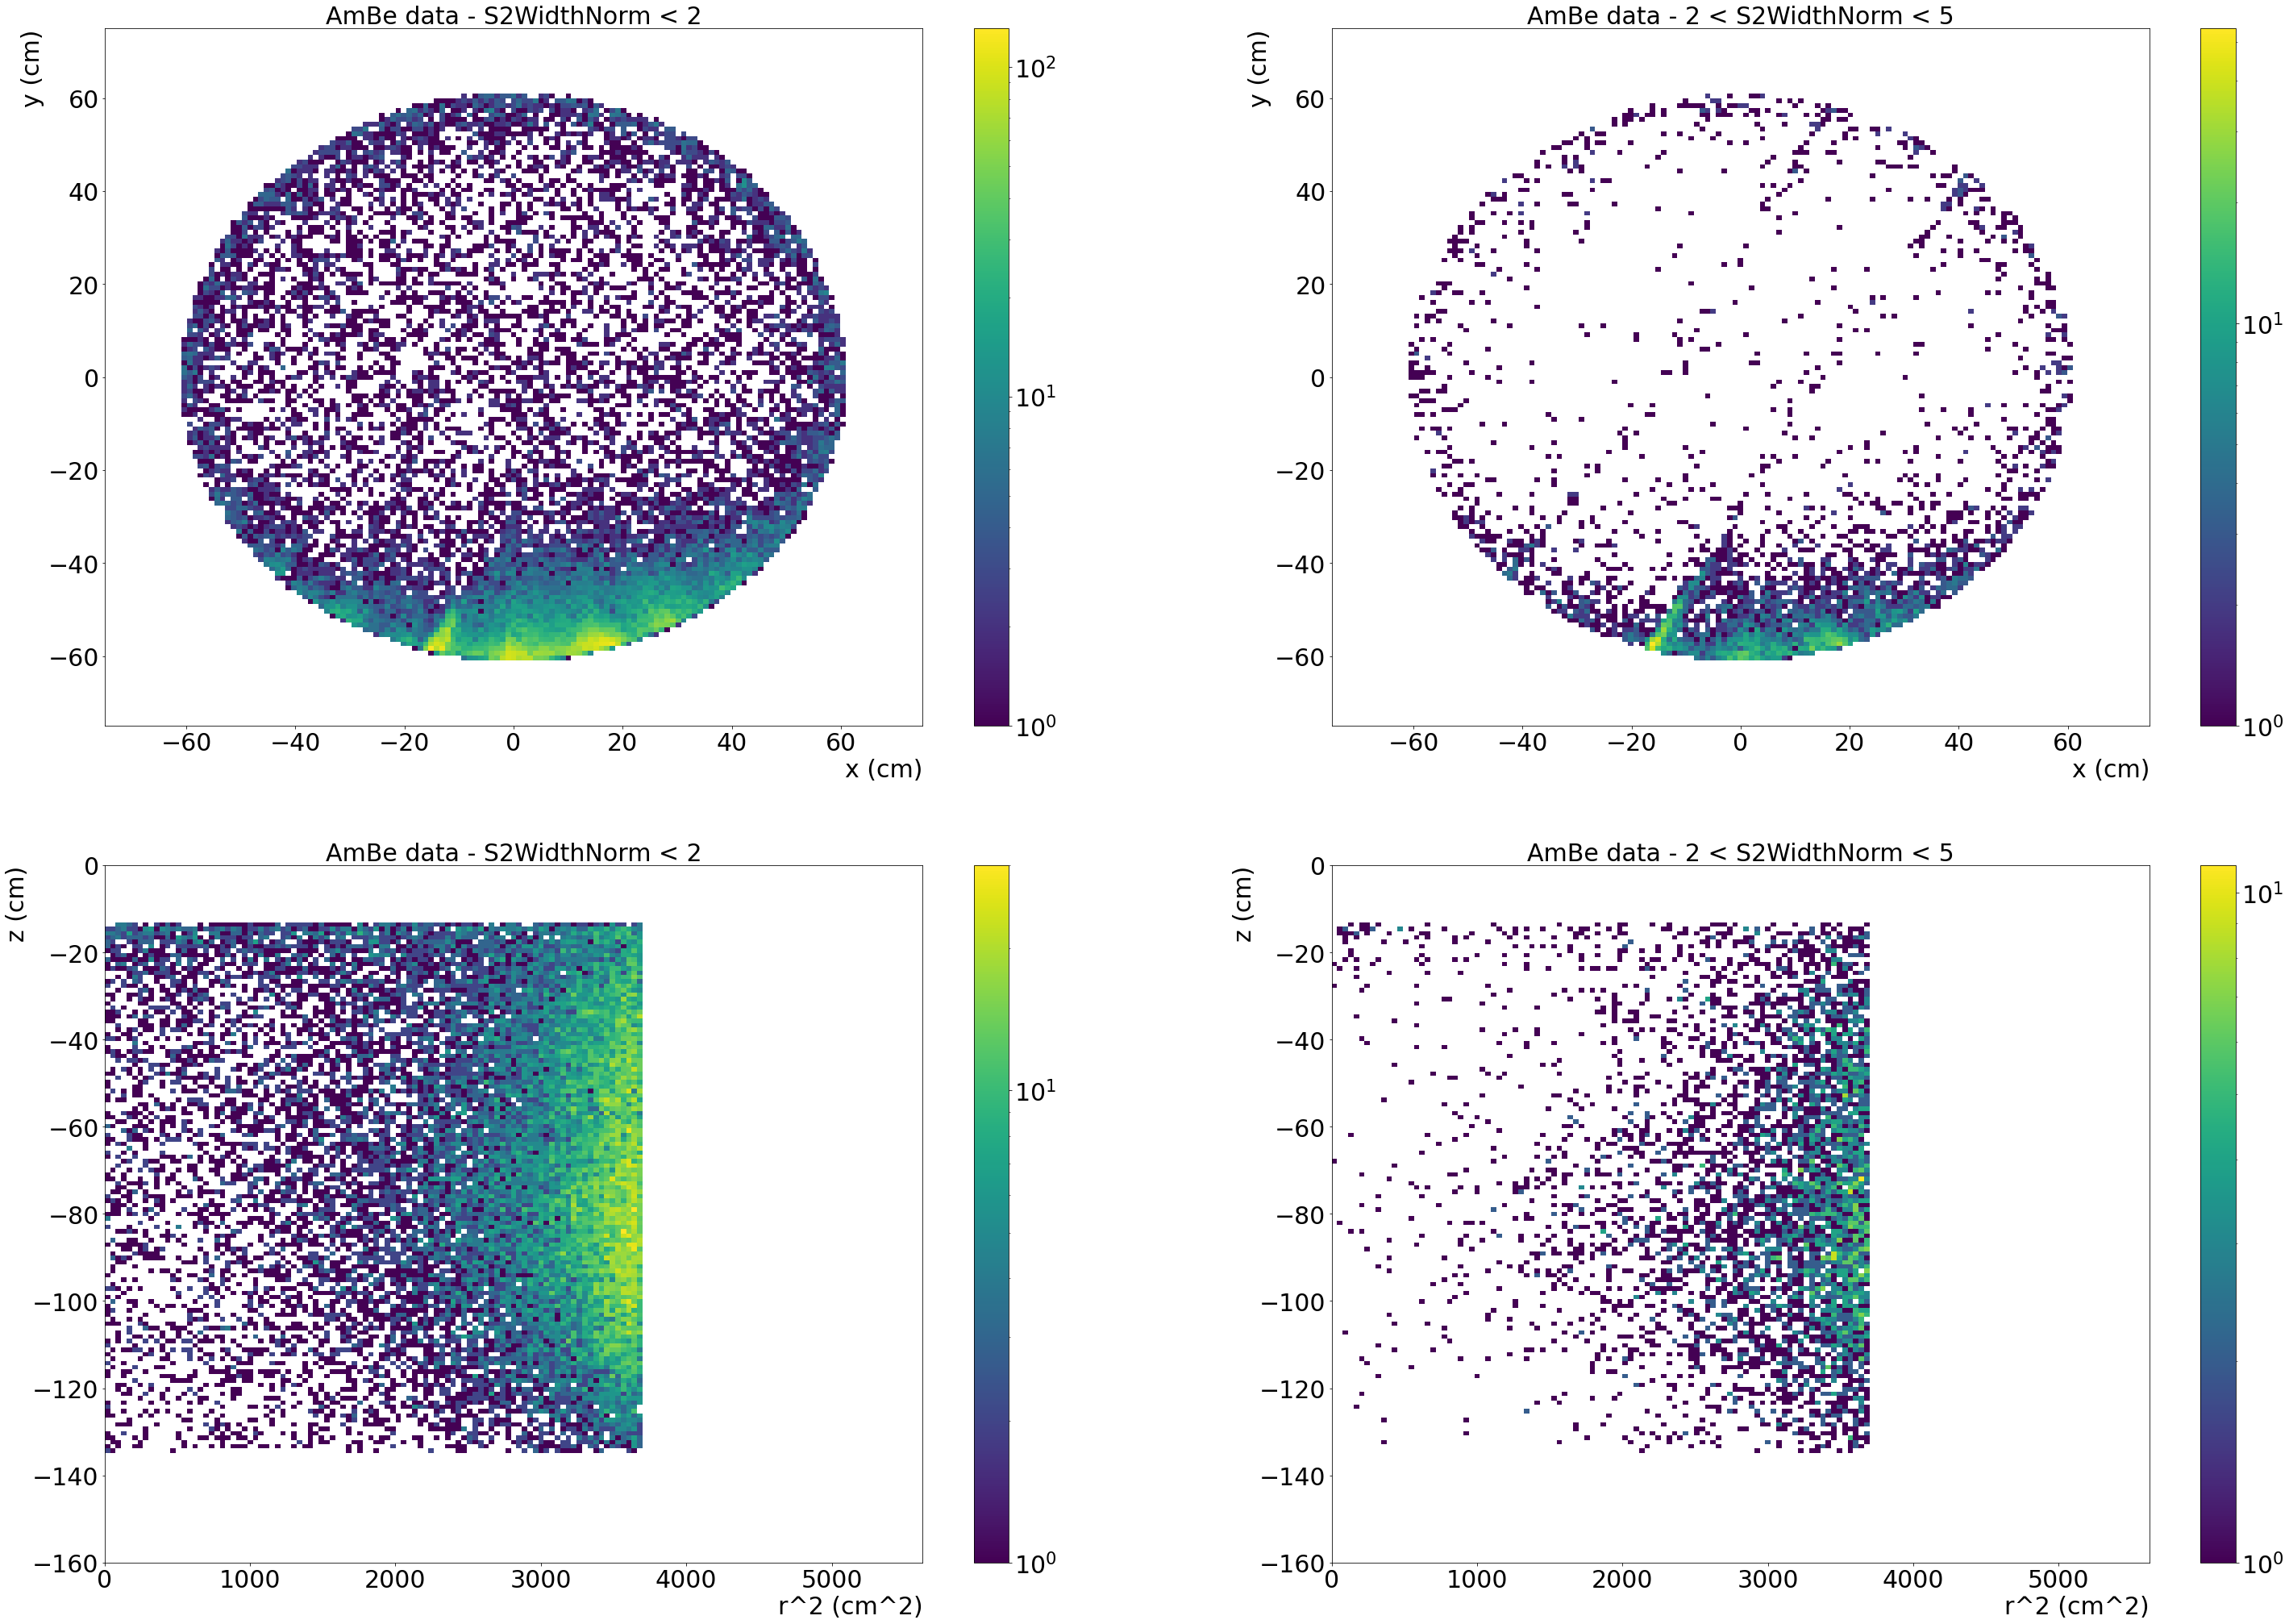

selected events 31757
selected events 5621


/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:452: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:452: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


selected events 1143


/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:452: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


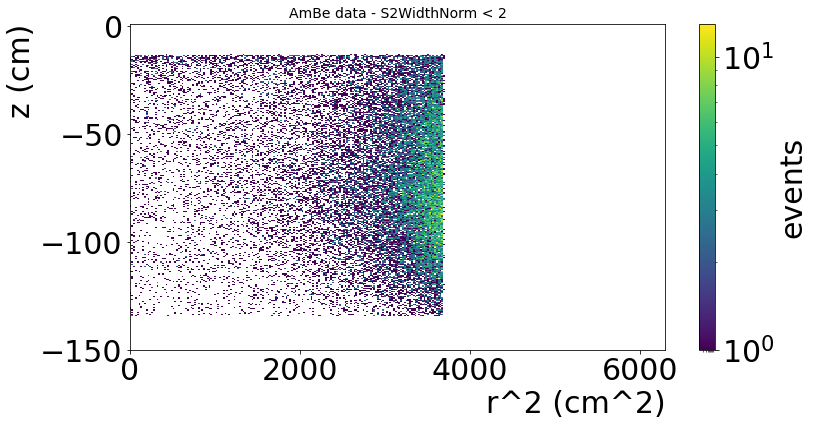

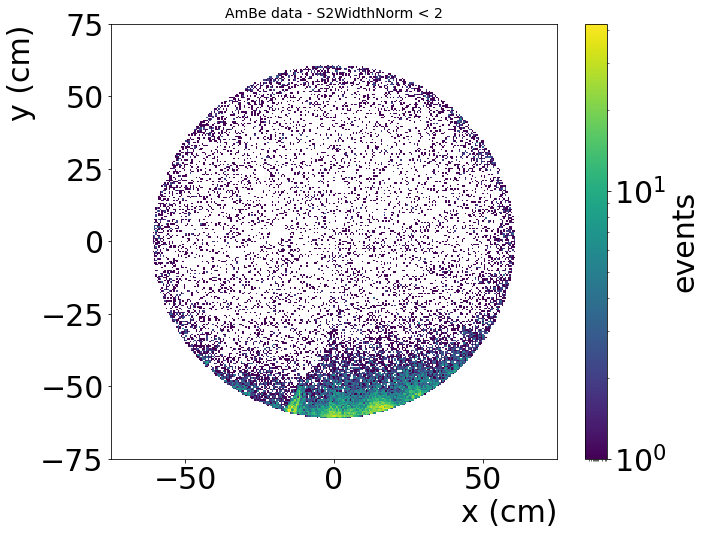

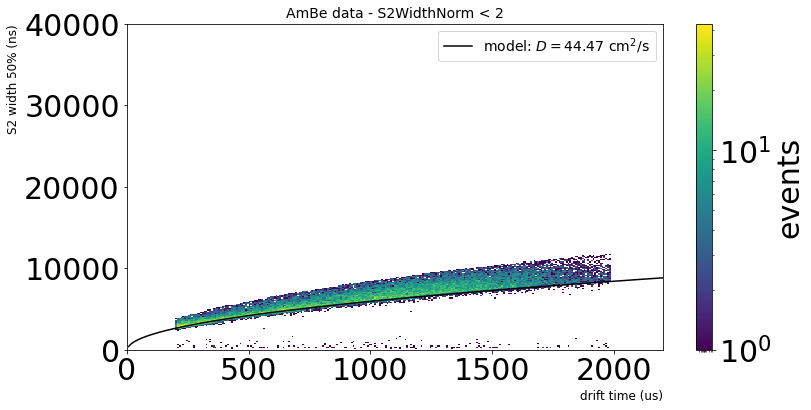

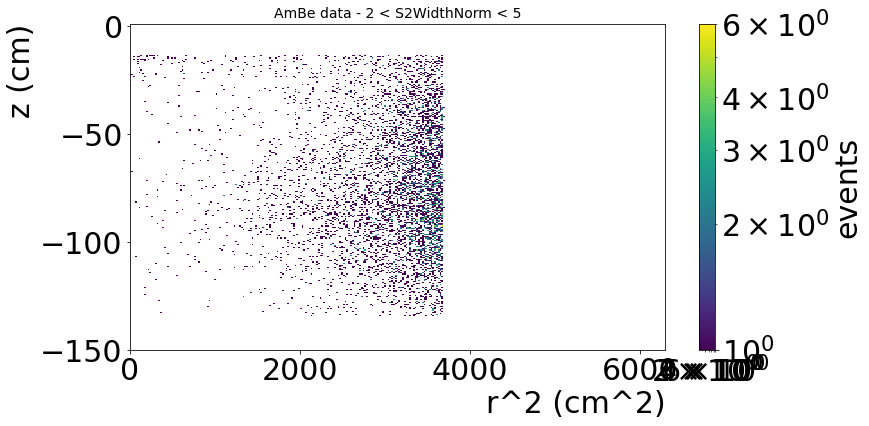

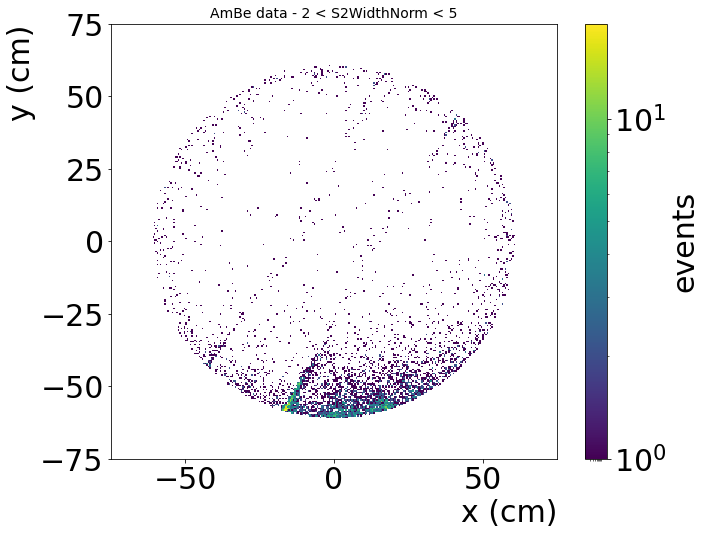

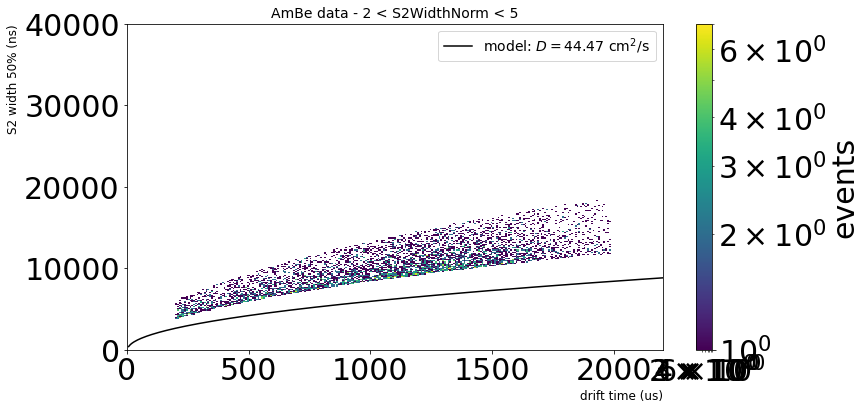

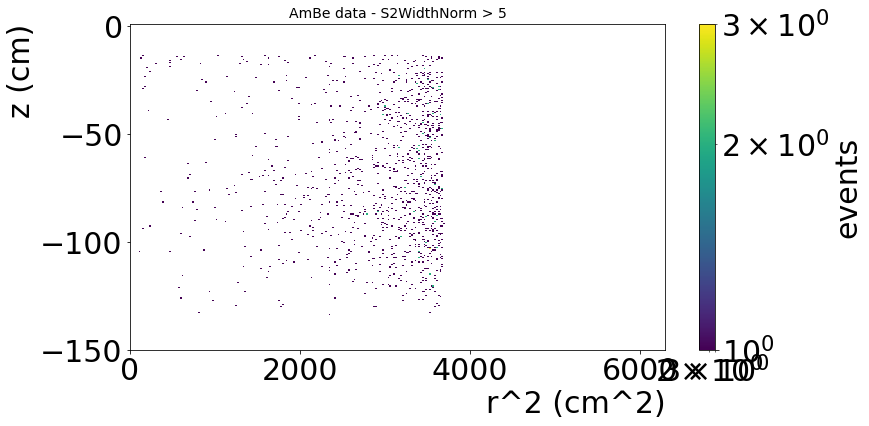

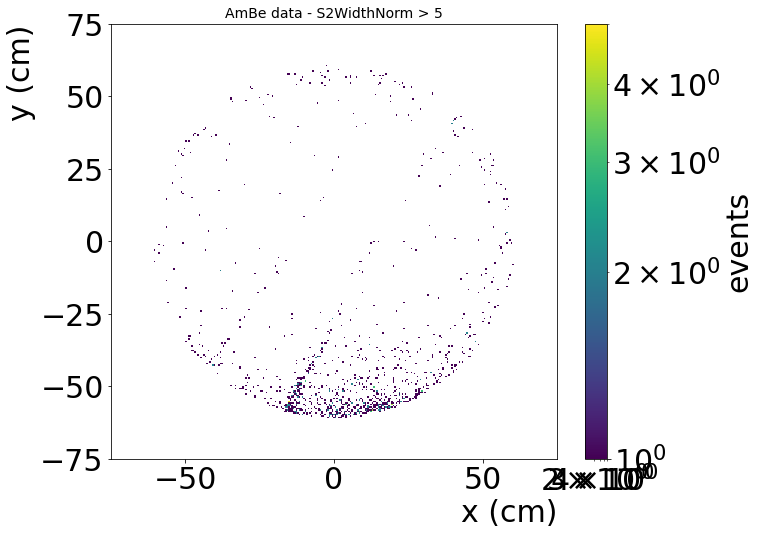

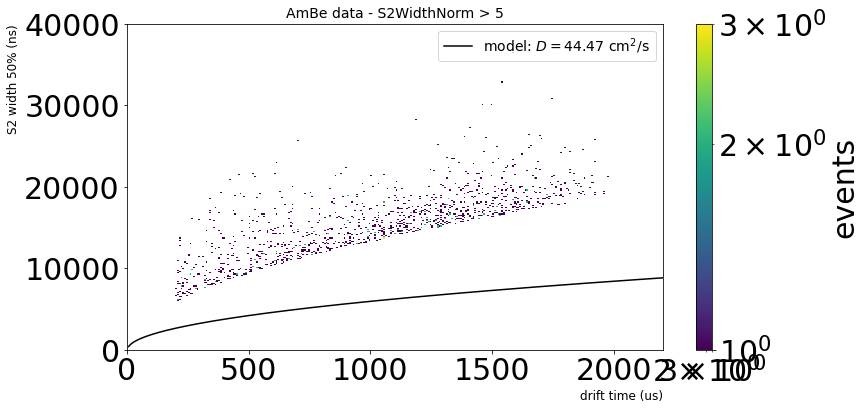

In [6]:
analysis(ev[mask],title='AmBe data')

total events 6757
selected events 6757


/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:452: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


selected events 5078
selected events 1364


/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:452: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:452: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


selected events 308


/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:452: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


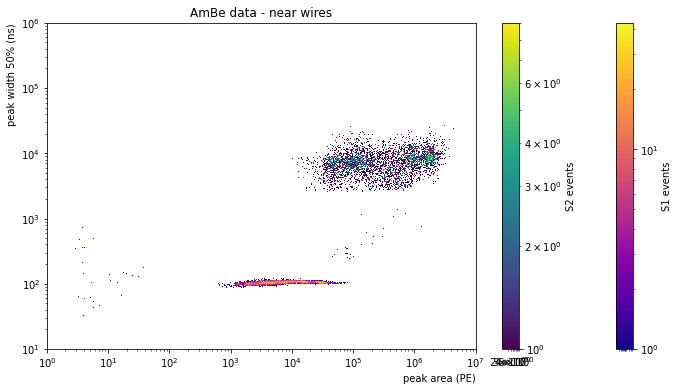

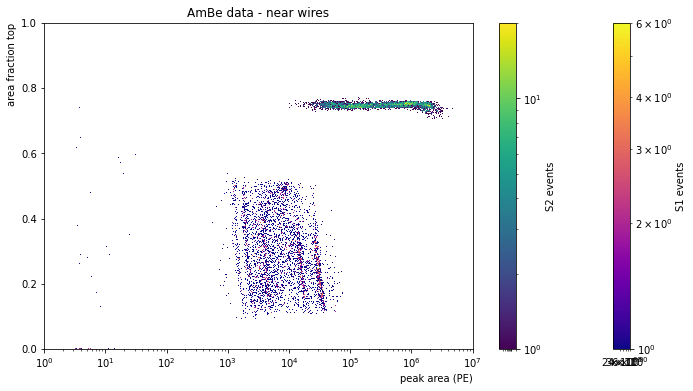

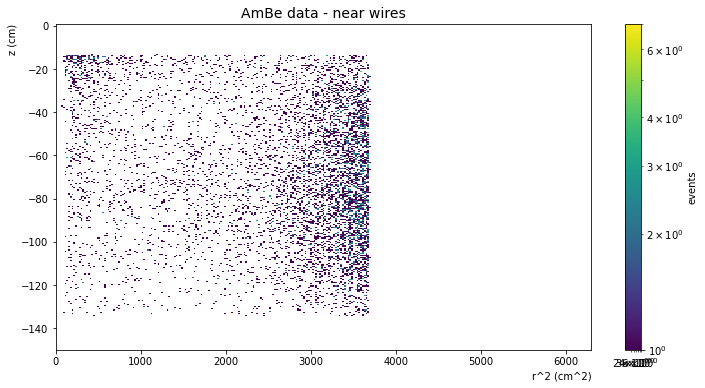

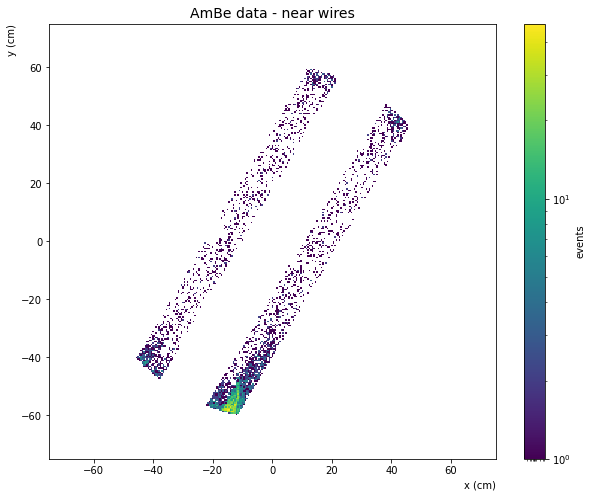

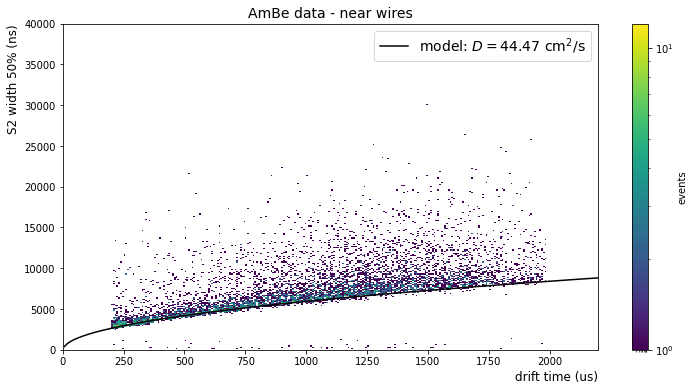

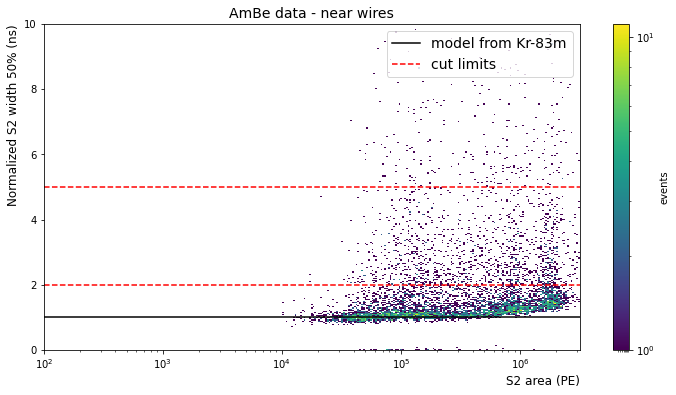

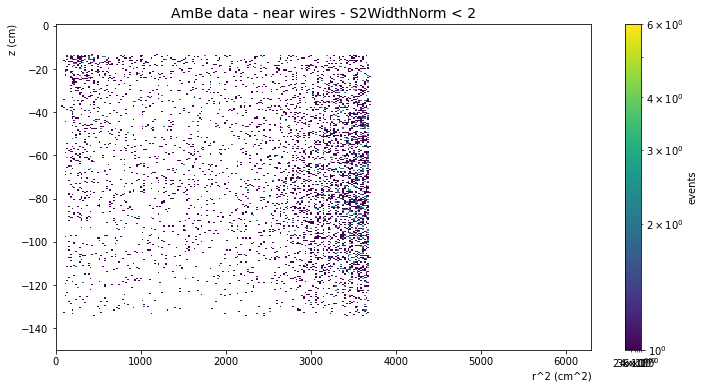

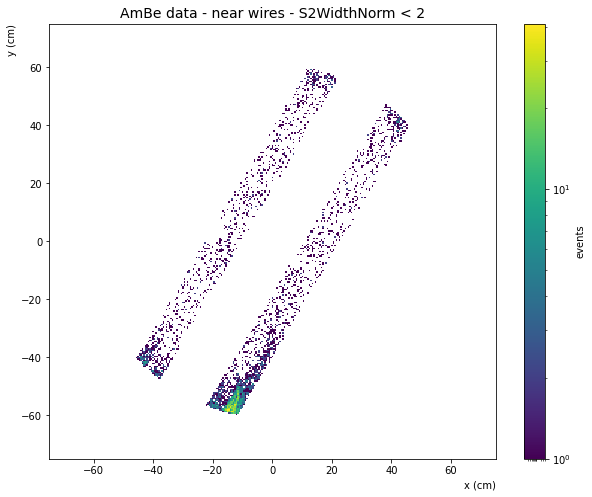

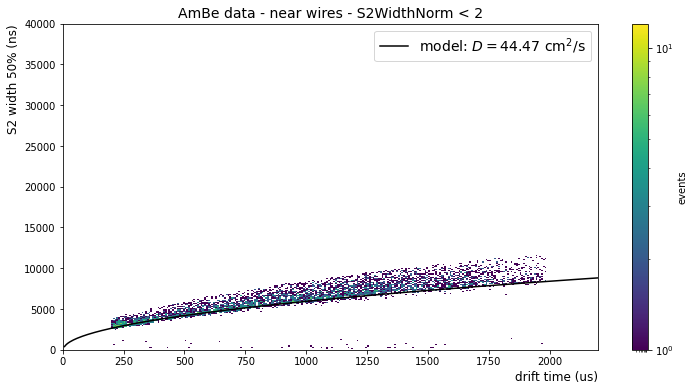

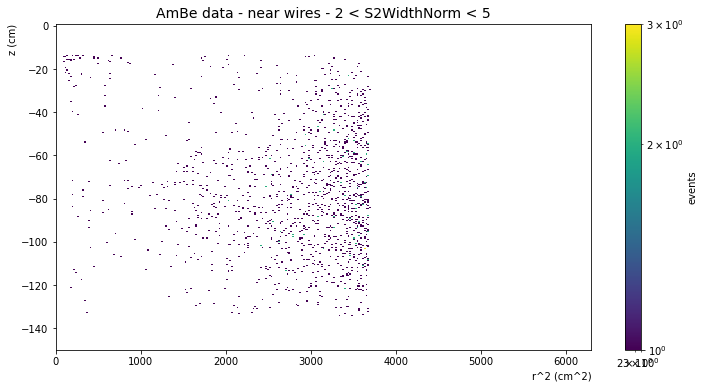

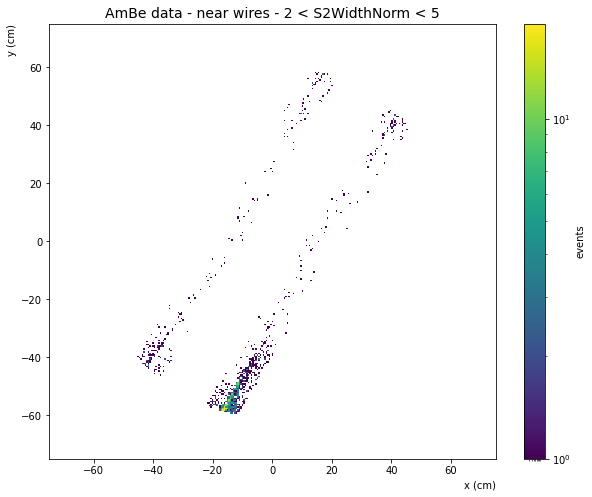

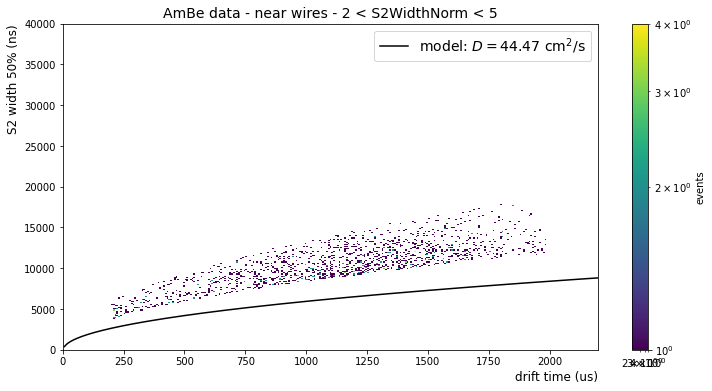

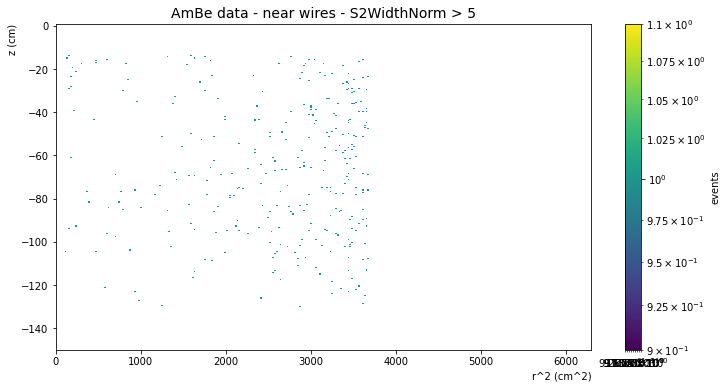

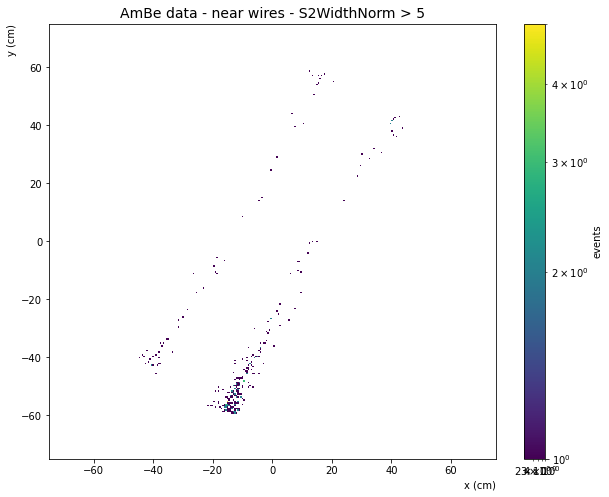

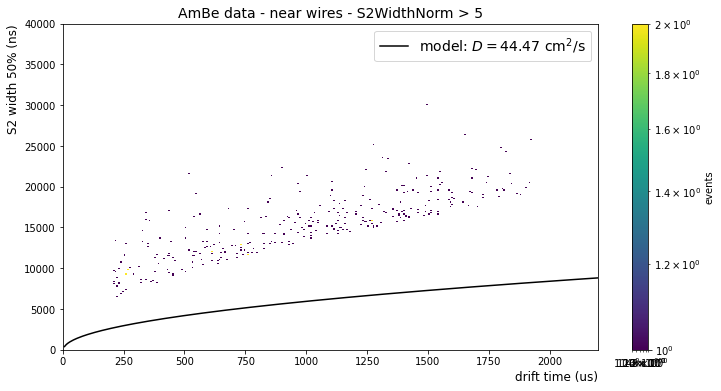

In [7]:
analysis(ev[mask & maskNW],title='AmBe data - near wires')

total events 31797
selected events 31797


/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:452: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


selected events 26679
selected events 4257


/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:452: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)
/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:452: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


selected events 835


/home/valerioda/xenon-notes/fast_response_analysis/s2widthcut_utility.py:452: RuntimeWarning: invalid value encountered in sqrt
  return sigma_to_r50p * np.sqrt(2 * D * (t-tGate) / vd**2)


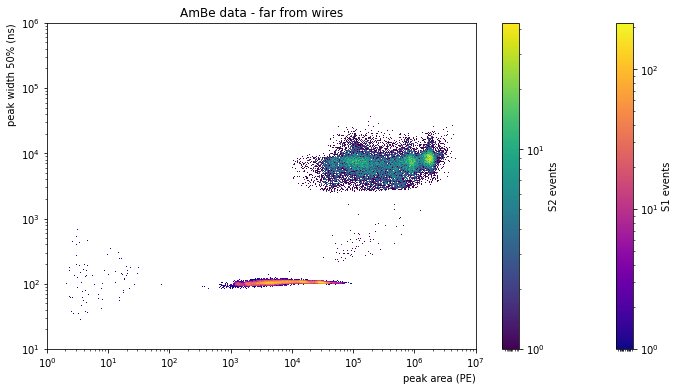

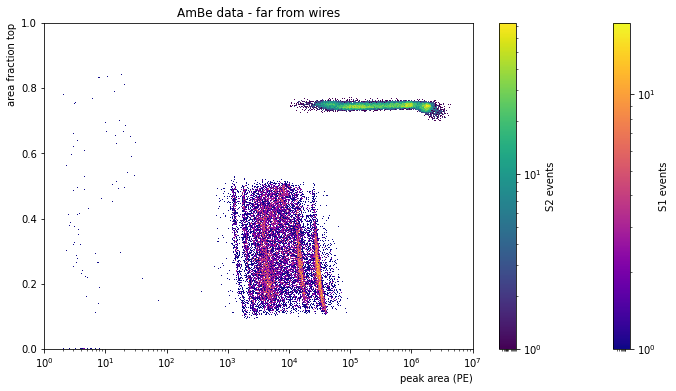

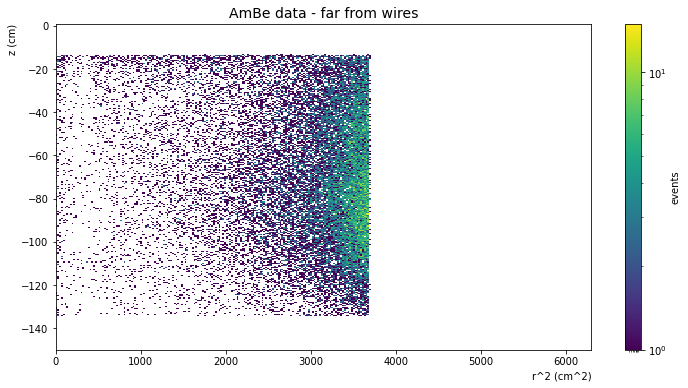

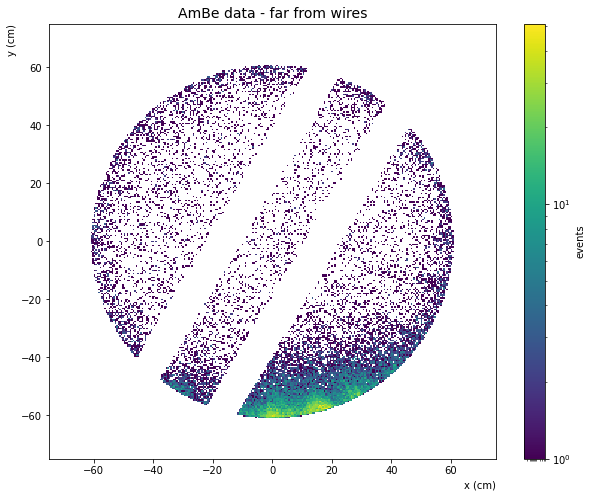

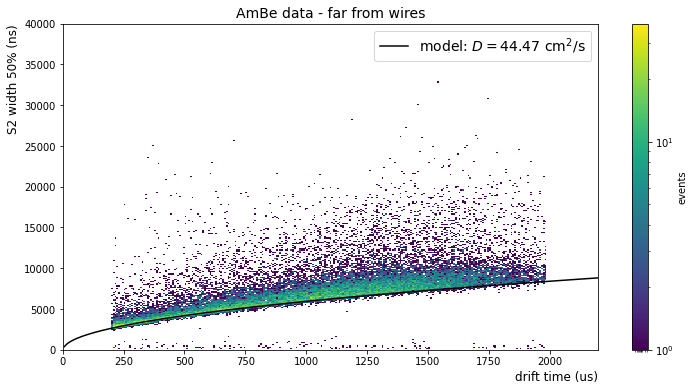

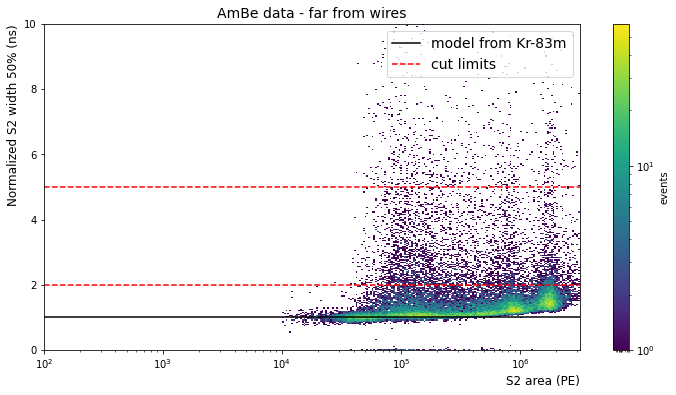

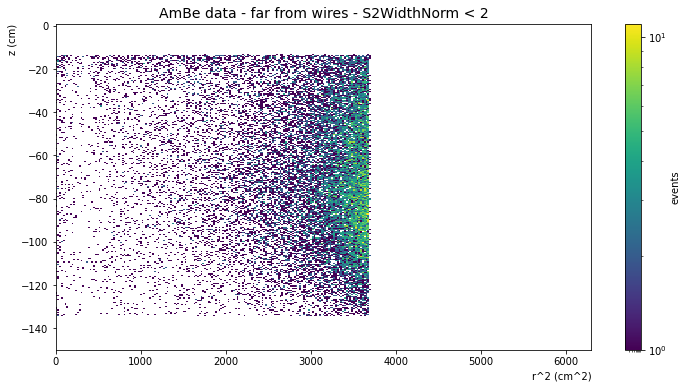

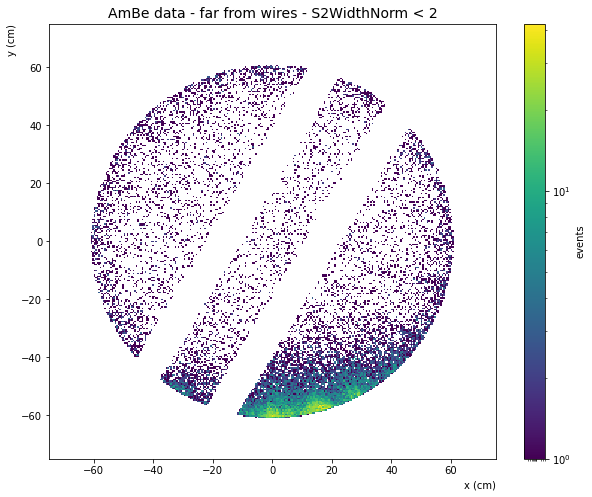

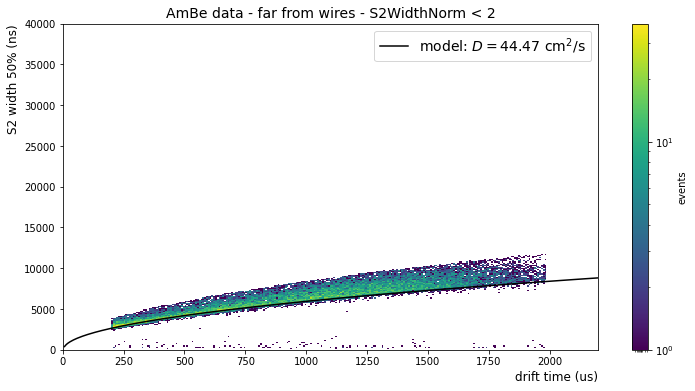

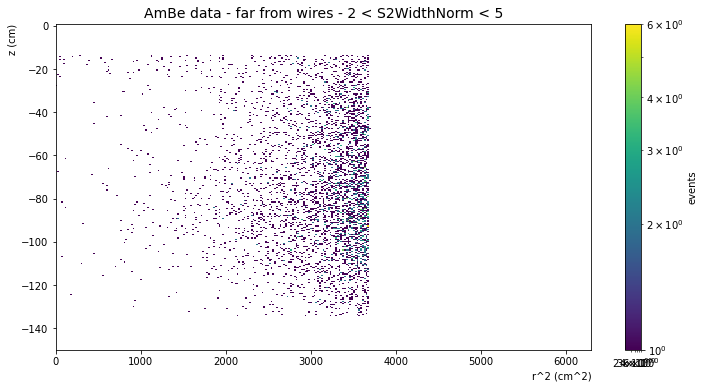

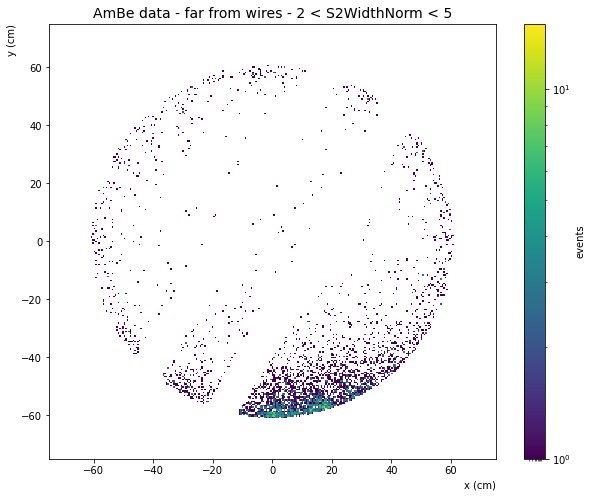

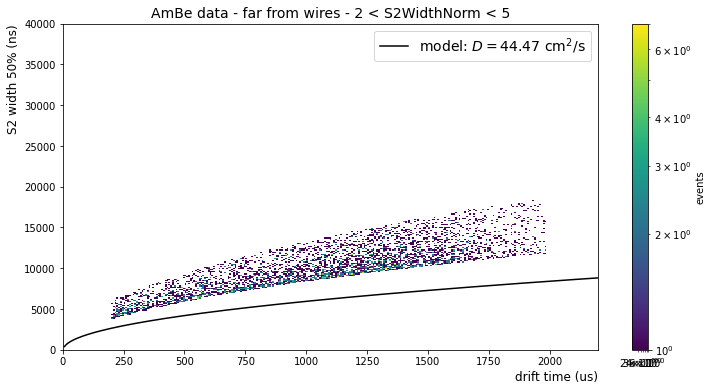

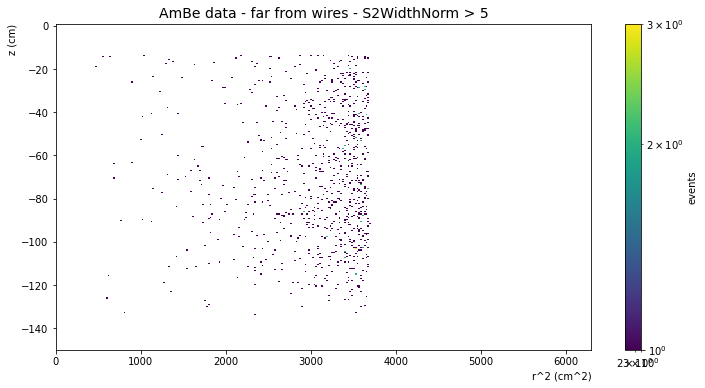

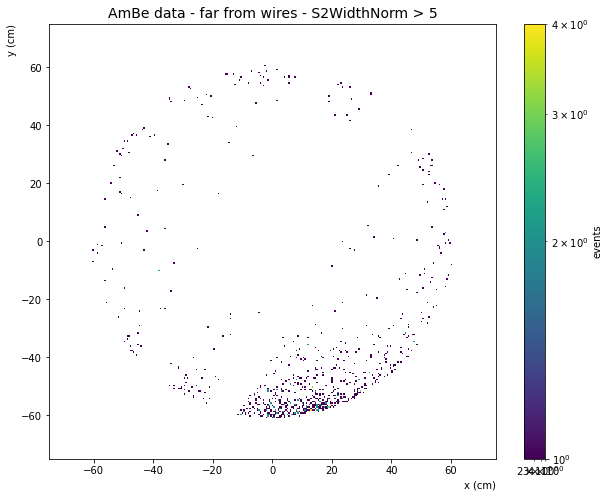

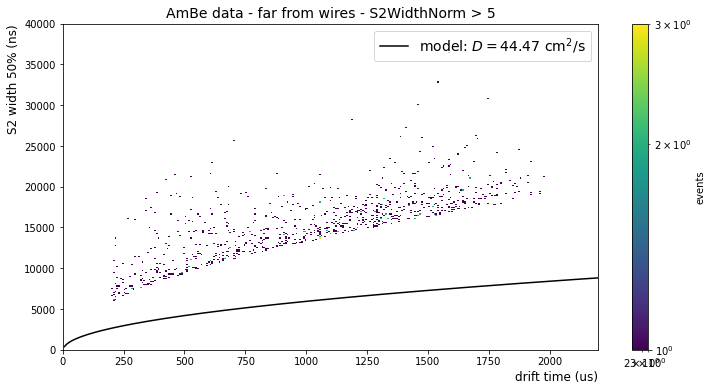

In [8]:
analysis(ev[mask & maskFW],title='AmBe data - far from wires')

In [24]:
def display_events(st,run_id='021463',nev=1):
    #display(HTML("<style>.container { width:70% !important; }</style>"))
    ev0 = st.get_array(run_id, ['event_info',
                             'cut_s1_max_pmt',
                             'cut_s1_area_fraction_top',
                             'cut_s2_single_scatter',
                             'cut_s2_width_naive',
                             'cut_fiducial_volume',
                             'cut_daq_veto'])
    cut=(ev0['cut_s1_max_pmt'])&(ev0['cut_daq_veto'])&(ev0['cut_s1_area_fraction_top'])&(ev0['cut_s2_single_scatter'])
    mask = wcu.basic_cuts(ev0) & cut & ev0['cut_fiducial_volume']
    maskNW, maskFW = wcu.mask_events_near_wire(ev0)
    events = ev0[mask]
    print('events before selection',len(ev0),'events after selection',len(events))
    for i in range(nev):
        idx = int(np.random.rand()*len(events))
        fig = st.event_display_interactive(run_id,
                                           time_range=(events[idx]['time'],
                                                       events[idx]['endtime']),
                                           bottom_pmt_array=False)
        bklt.show(fig)

In [25]:
display_events(st,run_id='021463')

Loading plugins: |          | 0.00 % [00:00<?]

events before selection 638 events after selection 9


/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/strax/chunk.py:364: NumbaExperimentalFeatureWarning: Record(Reconstructed cnn S2 X position (cm), uncorrected[type=float32;offset=0;title=Reconstructed cnn S2 X position (cm), uncorrected],x_cnn[type=float32;offset=0;title=Reconstructed cnn S2 X position (cm), uncorrected],Reconstructed cnn S2 Y position (cm), uncorrected[type=float32;offset=4;title=Reconstructed cnn S2 Y position (cm), uncorrected],y_cnn[type=float32;offset=4;title=Reconstructed cnn S2 Y position (cm), uncorrected],Start time since unix epoch [ns][type=int64;offset=8;title=Start time since unix epoch [ns]],time[type=int64;offset=8;title=Start time since unix epoch [ns]],Exclusive end time since unix epoch [ns][type=int64;offset=16;title=Exclusive end time since unix epoch [ns]],endtime[type=int64;offset=16;title=Exclusive end time since unix epoch [ns]],Reconstructed mlp S2 X position (cm), uncorrected[type=float32;offset=24;title=Reconstructed

Loading BokehJS ...

/opt/XENONnT/anaconda/envs/XENONnT_development/lib/python3.8/site-packages/straxen/analyses/bokeh_waveform_plot.py:561: RuntimeWarning: divide by zero encountered in log10
  area_plot = np.log10(area_per_channel)


NameError: name 'bklt' is not defined

In [14]:
wcu.display_events_S2WidthCut(st,AmBe_runs[4], nev = 10, s2_width_cut = True)

run 021455, start 2021-06-05 01:17:20.003368, livetime 1800.93 s, rate: 7.14 Hz, selection rate: 0.16 Hz
total events 12864 selected events 1635
events before width cut 89 events after selection 86 no width cut 3


/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.8/site-packages/multihist.py:329: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bin_edges = np.array(bin_edges)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.8/site-packages/multihist.py:449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([self.bin_centers(axis=i) for i in range(self.dimensions)])


Loading BokehJS ...

/dali/lgrandi/strax/straxen/straxen/analyses/bokeh_waveform_plot.py:561: RuntimeWarning: divide by zero encountered in log10
  area_plot = np.log10(area_per_channel)


/dali/lgrandi/strax/straxen/straxen/analyses/bokeh_waveform_plot.py:561: RuntimeWarning: divide by zero encountered in log10
  area_plot = np.log10(area_per_channel)


In [15]:
wcu.display_events_S2WidthCut(st,AmBe_runs[4], nev = 3, s2_width_cut = False)

run 021455, start 2021-06-05 01:17:20.003368, livetime 1800.93 s, rate: 7.14 Hz, selection rate: 0.16 Hz
total events 12864 selected events 1635
events before width cut 89 events after selection 86 no width cut 3


/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.8/site-packages/multihist.py:329: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bin_edges = np.array(bin_edges)
/dali/lgrandi/strax/miniconda3/envs/strax/lib/python3.8/site-packages/multihist.py:449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([self.bin_centers(axis=i) for i in range(self.dimensions)])
